In [1]:
# Importa las librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch 
from torch.autograd import Variable

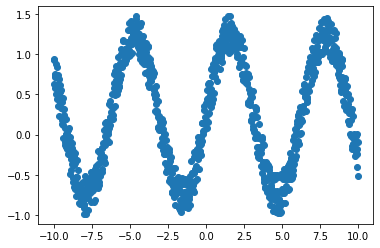

In [2]:
# Importa los datos para la regresion 
data = pd.read_csv('MLP_regresion.csv')
x = np.array(data['X'])
y = np.array(data['Y'])

# Grafica los datos
fig = plt.figure()
plt.plot(x,y,'o')

# Transforma los datos de arrglos numpy a tensores 
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)

Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

Epoch: [1000/6800], loss: 0.09403184056282043


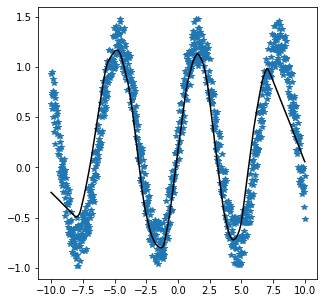

Epoch: [2000/6800], loss: 0.05647203326225281


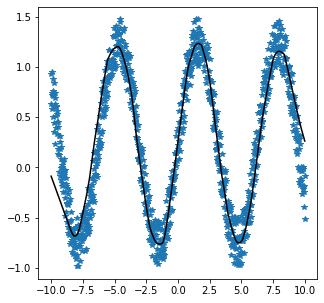

Epoch: [3000/6800], loss: 0.04736781865358353


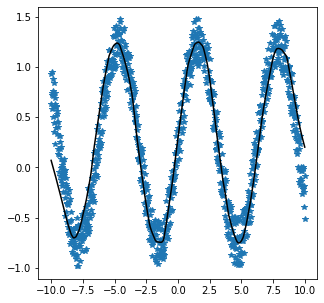

Epoch: [4000/6800], loss: 0.04053577780723572


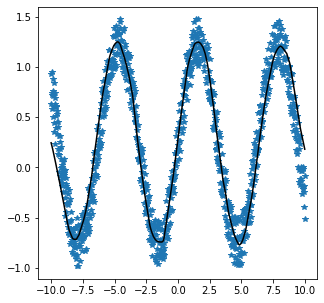

Epoch: [5000/6800], loss: 0.03507072851061821


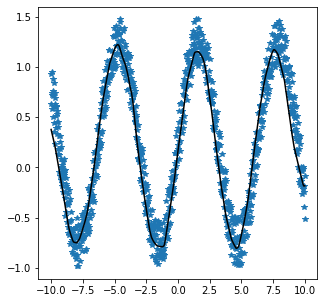

Epoch: [6000/6800], loss: 0.03199781849980354


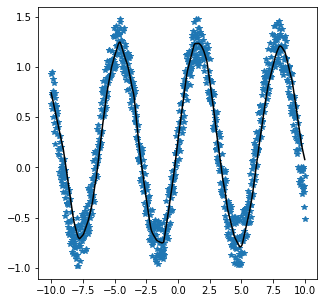

Epoch: [6800/6800], loss: 0.025762902572751045


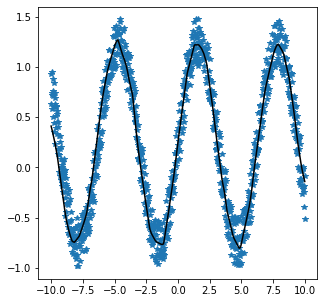

In [3]:
# Primer modelo 

input_dim = 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim,50),
    torch.nn.ReLU(),
    torch.nn.Linear(50,100),
    torch.nn.ReLU(),
    torch.nn.Linear(100,300),
    torch.nn.ReLU(),
    torch.nn.Linear(300,100),
    torch.nn.ReLU(),
    torch.nn.Linear(100,50),
    torch.nn.ReLU(),
    torch.nn.Linear(50,input_dim)
)

optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
criterion = torch.nn.MSELoss()

n_epoch=6800
loss_list = []

for epoch in range(n_epoch):
    Y_pred = model(X)
    loss = criterion(Y_pred,Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if ((epoch+1)%1000 == 0) or ((epoch+1)== 6800):
        print('Epoch: [{}/{}], loss: {}'.format(epoch+1,n_epoch,loss.item()))
        fig = plt.figure(figsize=(5,5))
        plt.plot(X.data.numpy(),Y.data.numpy(),'*')
        plt.plot(X.data.numpy(),Y_pred.data.numpy(),'k-')
        plt.show()


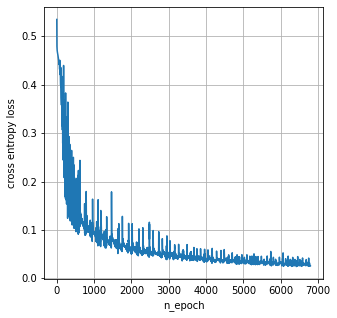

In [4]:
# Grafica la perdida
fig = plt.figure(figsize=(5,5))
plt.plot(loss_list)
plt.xlabel('n_epoch')
plt.ylabel('cross entropy loss')
plt.grid()
plt.show()

### Primer Modelo
En el modelo anterior se hace un modelo para ajustar una curva a unos datos que tienen una forma sinusoidal con un poco de ruido. Para esto se hace una red neuronal con 5 capas ocultas. Cada capa tiene 50, 100, 300, 100 y 50 neuronas. La tasa de aprendizaje es de aprendizaje es de 0.1 y hace el proceso en 6800 epocas. El valor de perdida final es de 0.03, el cual es bastante bajo y en la gráfica de la curva podemos analizar visualmente que tiene un ajuste bastante cercano al esperado. La curva de perdida tambien tiene la forma esperada, en donde, a medida que aumentan las epocas el valor de perdida disminuye. En este caso se están tomando bastantes capas y neuronas, por lo que es de esperarse que el valor del error pueda variar de epoca a epoca. 

Epoch: [100/2000], loss: 0.35442522168159485


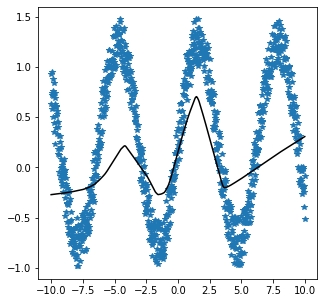

Epoch: [200/2000], loss: 0.24050255119800568


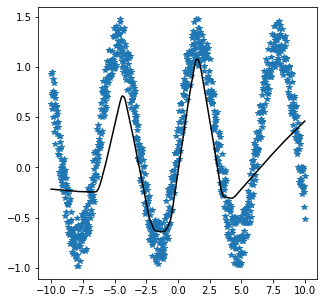

Epoch: [300/2000], loss: 0.2060793936252594


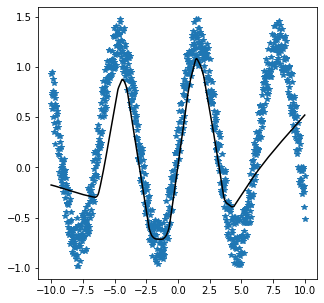

Epoch: [400/2000], loss: 0.18092669546604156


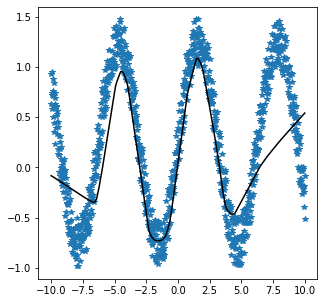

Epoch: [500/2000], loss: 0.1640610247850418


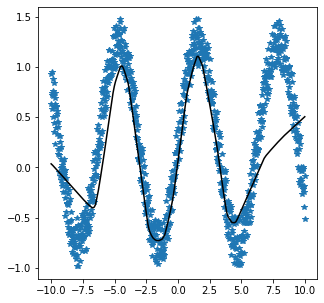

Epoch: [600/2000], loss: 0.14879262447357178


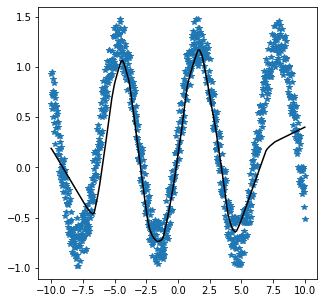

Epoch: [700/2000], loss: 0.1238304078578949


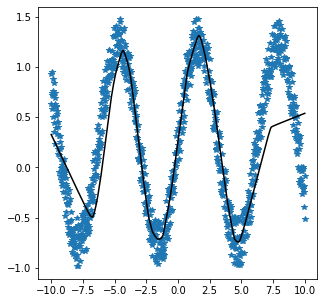

Epoch: [800/2000], loss: 0.15131700038909912


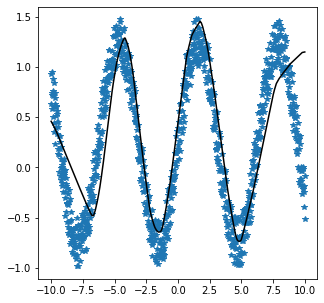

Epoch: [900/2000], loss: 0.10631407797336578


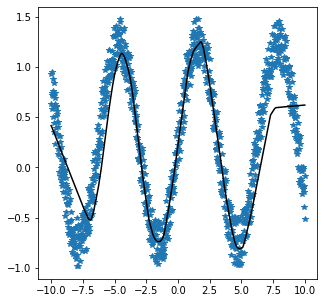

Epoch: [1000/2000], loss: 0.10561452060937881


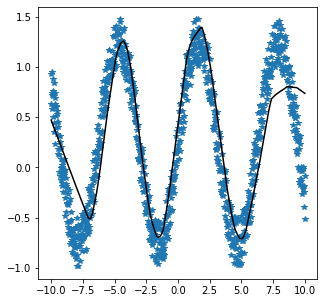

Epoch: [1100/2000], loss: 0.09672463685274124


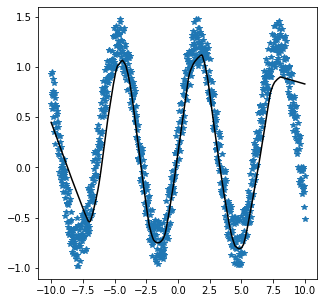

Epoch: [1200/2000], loss: 0.09581786394119263


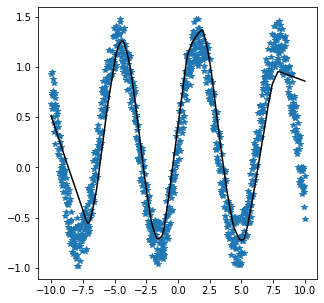

Epoch: [1300/2000], loss: 0.10227449983358383


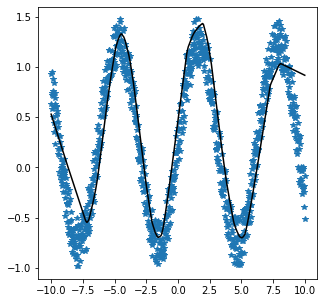

Epoch: [1400/2000], loss: 0.09615084528923035


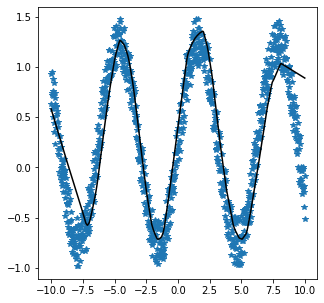

Epoch: [1500/2000], loss: 0.08652932941913605


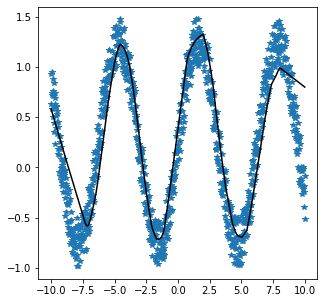

Epoch: [1600/2000], loss: 0.09501520544290543


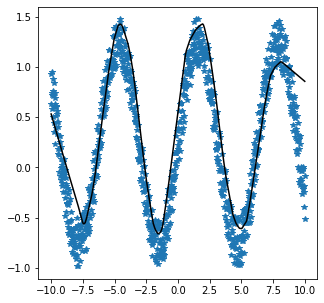

Epoch: [1700/2000], loss: 0.0838271901011467


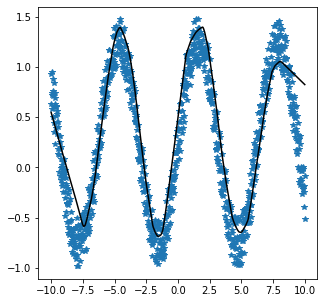

Epoch: [1800/2000], loss: 0.07191292941570282


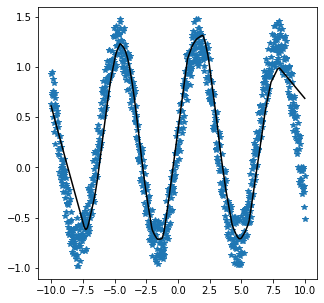

Epoch: [1900/2000], loss: 0.0787937268614769


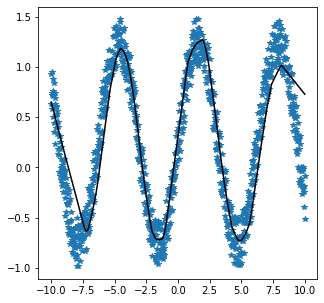

Epoch: [2000/2000], loss: 0.06685296446084976


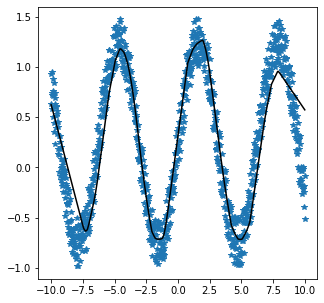

In [12]:
# Segundo modelo

input_dim = 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim,80),
    torch.nn.ReLU(),
    torch.nn.Linear(80,400),
    torch.nn.ReLU(),
    torch.nn.Linear(400,150),
    torch.nn.ReLU(),
    torch.nn.Linear(150,input_dim)
)

optimizer = torch.optim.GDS(model.parameters(),lr=0.1)
criterion = torch.nn.MSELoss()

n_epoch=2000
loss_list = []

for epoch in range(n_epoch):
    Y_pred = model(X)
    loss = criterion(Y_pred,Y)
    loss_list.append(loss.item())
  
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    if ((epoch+1)%100 == 0) or ((epoch+1)== n_epoch):
        print('Epoch: [{}/{}], loss: {}'.format(epoch+1,n_epoch,loss.item()))
        fig = plt.figure(figsize=(5,5))
        plt.plot(X.data.numpy(),Y.data.numpy(),'*')
        plt.plot(X.data.numpy(),Y_pred.data.numpy(),'k-')
        plt.show()


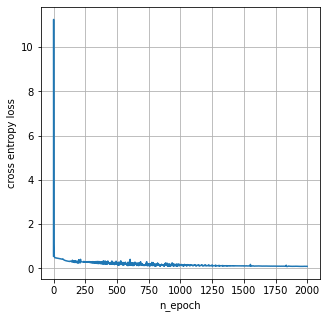

In [6]:
# Grafica el error
fig = plt.figure(figsize=(5,5))
plt.plot(loss_list)
plt.xlabel('n_epoch')
plt.ylabel('cross entropy loss')
plt.grid()
plt.show()

### Segundo Modelo
En el segundo modelo se hace nuevamente un modelo para ajustar una curva a unos datos que tienen una forma sinusoidal con un poco de ruido. Para esto se hace una red neuronal con 3 capas ocultas, menos capas que en el primer modelo. Cada capa tiene 80, 400 y 150 neuronas. La tasa de aprendizaje es de aprendizaje es de 0.1 y hace el proceso en 2000 epocas. El valor de perdida final es de 0.06, el cual es bastante bajo, sin embargo, es más alto que la perdida del primer modelo y en la gráfica de la curva podemos analizar visualmente que tiene un ajuste bastante cercano al esperado, pero no es igual. 

En el segundo modelo, se toman menos epocas, menos capas y menos neuronas, esto también se ve en la disminución de la variación en el valor de la perdida entre las epocas y en el costo computacional. Ambos modelos son buenos para ajustar la curva a los datos, pero es evidente que el primero tiene una menor perdida y se ajusta mejor a los datos. Sin embargo, en el segundo caso, hay una menor variación desfavorable para el modelo, probablemente, debido a que se evita el sobreajuste. 